In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def get_file_data(csv, pos):
    csvf = open(csv, 'r')
    csvflines = csvf.readlines()
    csvf.close()
    
    data = []    
    for line in csvflines[1:]:
        values =  line.strip('\n[]').split(',')
        data.append(float(values[pos]))
        
    return data

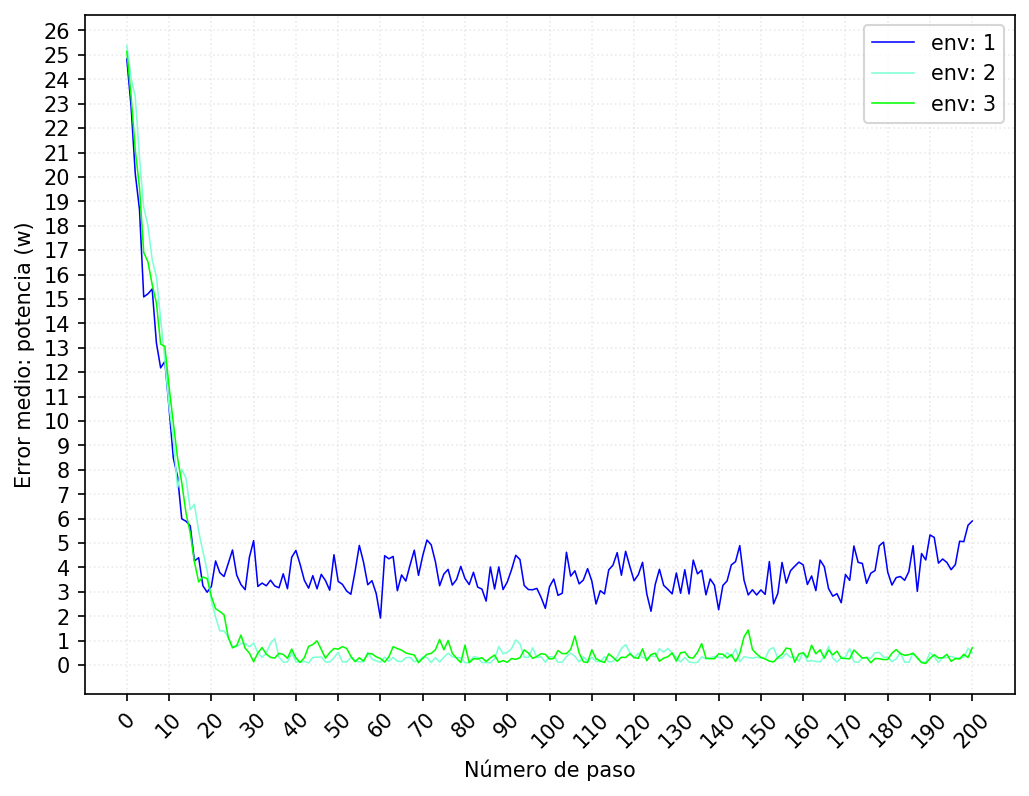

In [6]:
########################
### POWER MEAN ERROR ###
########################
key = 'power'
clr = 'blue'
pos = 8
target = 40.0
X = range(0, 201)
Xticks = np.arange(0, 201, 10)
Yticks = np.arange(0, 27, 1)

paths = ['../../FinalEnv01/test-02/', '../../FinalEnv02/test-02/', './']
labels = [f'env: {i}' for i in [1,2,3]]
clrs  = ['blue', 'aquamarine', 'lime']
chkpt = 5

fig = plt.figure(figsize=(8,6), dpi=150)

ax = fig.add_subplot(111)

for path, clr, label in zip(paths, clrs, labels):
    bundle = []
    for it in range(15):
        data = get_file_data(path + f'checkpoint-{chkpt}/iter-{it}.csv', pos)
        bundle.append([ abs(x - target) for x in data ])
    bundle = np.array(bundle)
    graph = bundle.mean(axis = 0)
    
    ax.plot(
        X, graph, 
        color = clr,
        label = label,
        linestyle = '-',
        linewidth = 0.75,
        marker = '',
        alpha = 1.0
    )
    
ax.set_xlabel('Número de paso')
ax.set_xticks(Xticks)
ax.set_xticklabels(Xticks, rotation=45)

ax.set_ylabel('Error medio: potencia (w)')
ax.set_yticks(Yticks)

ax.grid(
    alpha=0.25,
    linestyle=':',
)
ax.legend()

plt.savefig(f'../img/test-02.{key}.error.mean.png', bbox_inches='tight')

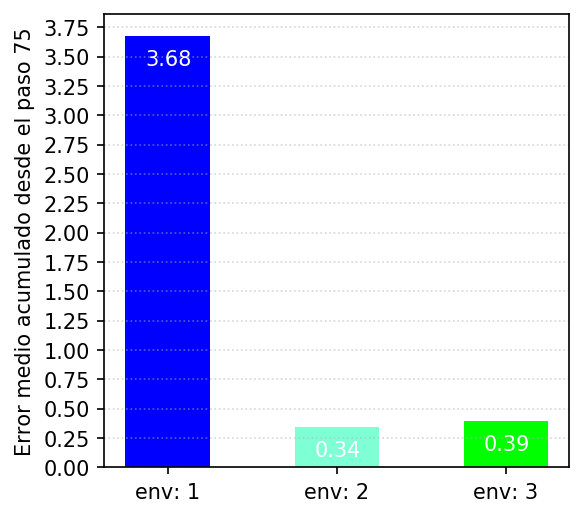

In [9]:
##############################
### POWER CUMULATIVE ERROR ###
##############################
key = 'power'
clr = 'blue'
pos = 8
target = 40.0
X = [1,2,3]
Yticks = np.arange(0, 3.76, 0.25)
count = 75

paths = ['../../FinalEnv01/test-02/', '../../FinalEnv02/test-02/', './']
clrs  = ['blue', 'aquamarine', 'lime']
labels = [f'env: {i}' for i in [1,2,3]]
chkpt = 5

fig = plt.figure(figsize=(4,4), dpi=150)
ax = fig.add_subplot(111)

graph = []
for path in paths:
    bundle = []
    for it in range(15):
        data = get_file_data(path + f'checkpoint-{chkpt}/iter-{it}.csv', pos)
        bundle.append([ abs(x - target) for x in data ])
    bundle = np.array(bundle)
    values = bundle.mean(axis = 0)
    graph.append( np.array(values[count:]).mean() )
    
ax.bar(
    X, graph, 
    color = clrs, 
    linestyle = '-',
    width = 0.50,
    alpha = 1.0
)

ax.set_xticks(X)
ax.set_xticklabels(labels)

ax.set_ylabel(f'Error medio acumulado desde el paso {count}')
ax.set_yticks(Yticks)

ax.grid(
    alpha=0.50,
    axis='y',
    linestyle=':',
)
    
for index, value in enumerate(graph):
    plt.text(index + 0.87, value - 0.25, "{:.2f}".format(value), color = 'white')

plt.savefig(f'../img/test-02.{key}.error.mean.cum.png', bbox_inches='tight')